[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Jan 19 03:57:12 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.8/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ocai8CL3jAtlBvjhKOF5")
project = rf.workspace("donttaptest").project("uofthacks12")
version = project.version(1)
dataset = version.download("yolov11")
dataset.location


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Uofthacks12-1 in yolov11:: 100%|██████████| 112/112 [00:00<00:00, 6656.68it/s]


'/content/Uofthacks12-1'

In [11]:
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

New https://pypi.org/project/ultralytics/8.3.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Uofthacks12-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

In [12]:
!yolo task=detect mode=val model="/content/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/Uofthacks12-1/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.20s/it]
                   all         10         10      0.732      0.997      0.995      0.931
                 Dsign          2          2      0.764          1      0.995      0.846
                 Hsign          1          1      0.649          1      0.995      0.895
                 Ksign          2          2      0.864          1      0.995      0.923
                 Lsign          2          2      0.386          1      0.995      0.995
                 Ysign          3          3          1      0.987      0.995      0.995
Speed: 0.3ms preprocess, 13.5ms inference, 0.0ms los

In [13]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs

image 1/5 /content/Uofthacks12-1/test/images/image_D_20250118_173345_995806_2_jpg.rf.745126aa09366ec4120ae9a2bd12dc2b.jpg: 640x640 1 Dsign, 15.6ms
image 2/5 /content/Uofthacks12-1/test/images/image_H_20250118_173244_119547_9_jpg.rf.d001c09167934368fdd5a0928a2fe789.jpg: 640x640 1 Hsign, 15.6ms
image 3/5 /content/Uofthacks12-1/test/images/image_K_20250118_173310_828875_9_jpg.rf.8195a0e2635cd568e4424178d3deea72.jpg: 640x640 1 Ksign, 15.6ms
image 4/5 /content/Uofthacks12-1/test/images/image_L_20250118_173357_424760_7_jpg.rf.cc24808d1a30b1e3d01f5966520169ed.jpg: 640x640 1 Lsign, 15.5ms
image 5/5 /content/Uofthacks12-1/test/images/image_L_20250118_173357_547010_8_jpg.rf.51241fa20cc2ce38102dff7f54a06437.jpg: 640x640 1 Lsign, 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 115.3ms postprocess per image at shape (1, 3, 640, 640)

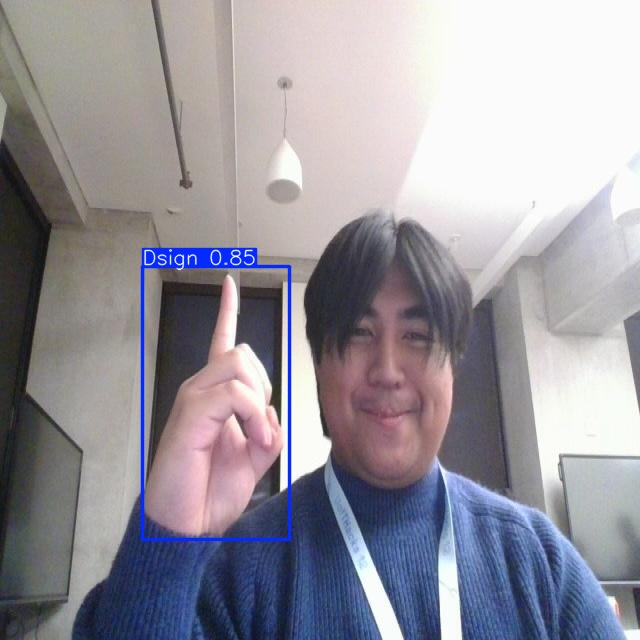

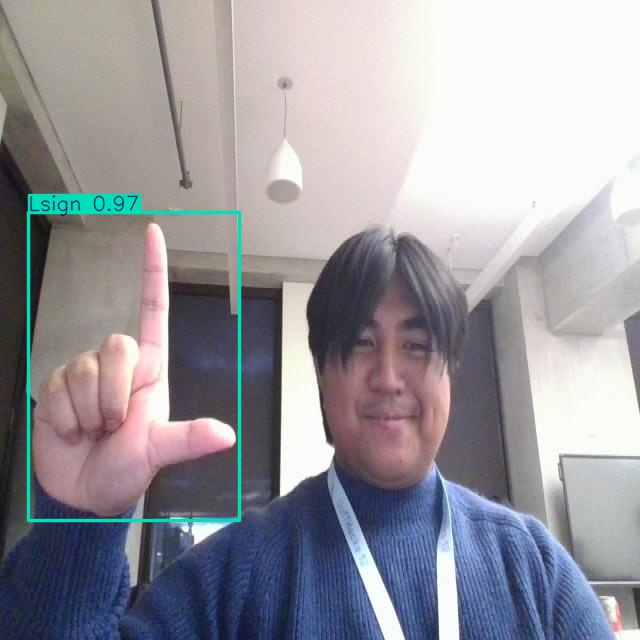

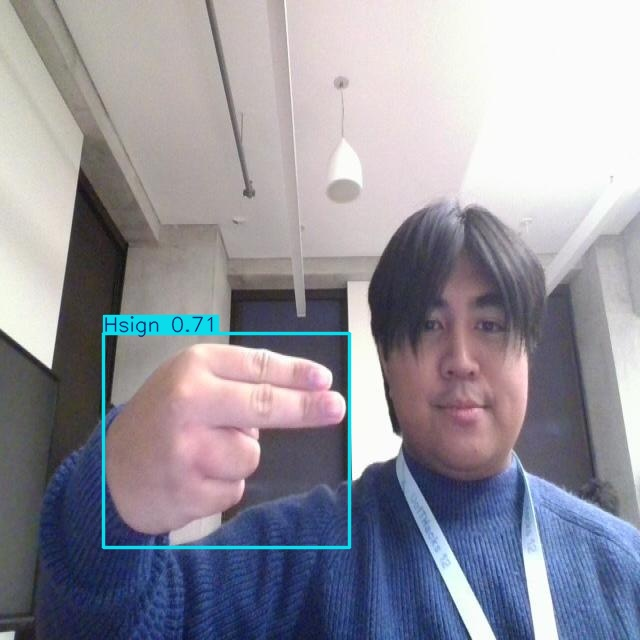

In [14]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")